# Convolutional Neural Network

In [1]:
import h5py
import numpy as np

def load_dataset():
    train_dataset = h5py.File('train_signs.h5', "r")
    train_set_x_orig = np.array(train_dataset["train_set_x"][:]) #  train features
    train_set_y_orig = np.array(train_dataset["train_set_y"][:]) #  train labels

    test_dataset = h5py.File('test_signs.h5', "r")
    test_set_x_orig = np.array(test_dataset["test_set_x"][:]) #  test features
    test_set_y_orig = np.array(test_dataset["test_set_y"][:]) #  test labels

    classes = np.array(test_dataset["list_classes"][:]) # list of classes
    
    train_set_y_orig = train_set_y_orig.reshape((train_set_y_orig.shape[0]),1)
    test_set_y_orig = test_set_y_orig.reshape((test_set_y_orig.shape[0],1))
    
    return train_set_x_orig, train_set_y_orig, test_set_x_orig, test_set_y_orig

In [2]:
#load your dataset here
X_train, Y_train, X_test, Y_test = load_dataset()

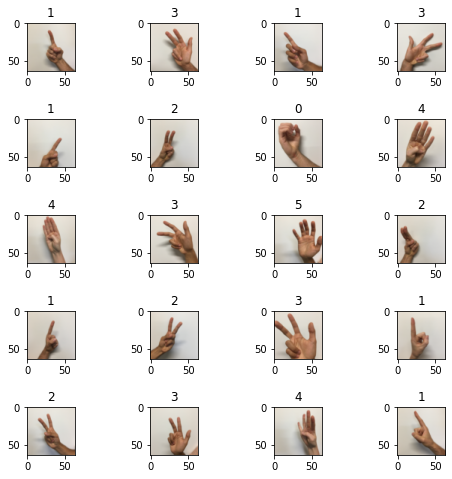

In [3]:
# Plot here
import matplotlib.pyplot as plt
# 20 random indicies
import random
samples = []
for i in range(20):
    samples.append(random.randint(0,len(X_train)))
samples
#plot in 4x5
plt.figure(figsize=(12,12))
for idx, item in enumerate(samples):
    plt.subplot(5, 4, idx+1)
    plt.imshow(X_train[item])
    plt.title(Y_train[item][0])
    plt.subplots_adjust(.5,.5,1,1,1,1)

In [15]:
# divide by the maximum possible value to scale down units 
X_train_new = X_train/255
X_test_new = X_test/255

In [16]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Flatten, Dense, Conv2D, MaxPooling2D
import tensorflow as tf

In [17]:
model = Sequential()
model.add(Conv2D(32,kernel_size = (5,5),strides=(1,1), activation='relu', input_shape = X_train.shape[1:]))
model.add(MaxPooling2D(pool_size = (2,2), strides = (2,2)))
model.add(Conv2D(64, (5,5), activation = 'relu'))
model.add(MaxPooling2D(pool_size = (2,2)))
model.add(Flatten())
model.add(Dense(1000, activation = 'relu'))
model.add(Dense(6, activation = 'softmax'))

In [18]:
model.compile(loss = 'SparseCategoricalCrossentropy', optimizer = 'adam', metrics = 'accuracy')

In [19]:
model.fit(X_train_new,Y_train, batch_size = 500, epochs = 100, validation_data = (X_test_new,Y_test))

Epoch 1/100
3/3 [==============================] - 3s 711ms/step - loss: 2.5620 - accuracy: 0.1593 - val_loss: 1.8131 - val_accuracy: 0.1667
Epoch 2/100
3/3 [==============================] - 2s 665ms/step - loss: 1.7883 - accuracy: 0.2352 - val_loss: 1.7469 - val_accuracy: 0.3167
Epoch 3/100
3/3 [==============================] - 2s 655ms/step - loss: 1.7155 - accuracy: 0.3611 - val_loss: 1.7080 - val_accuracy: 0.1667
Epoch 4/100
3/3 [==============================] - 2s 697ms/step - loss: 1.6156 - accuracy: 0.3657 - val_loss: 1.6033 - val_accuracy: 0.3250
Epoch 5/100
3/3 [==============================] - 2s 686ms/step - loss: 1.5087 - accuracy: 0.4389 - val_loss: 1.3776 - val_accuracy: 0.5917
Epoch 6/100
3/3 [==============================] - 3s 690ms/step - loss: 1.2922 - accuracy: 0.6009 - val_loss: 1.2292 - val_accuracy: 0.6917
Epoch 7/100
3/3 [==============================] - 2s 668ms/step - loss: 1.1477 - accuracy: 0.6259 - val_loss: 1.1262 - val_accuracy: 0.6667
Epoch 8/100
3

In [20]:
model.summary

<bound method Model.summary of <keras.engine.sequential.Sequential object at 0x000001E737482AC0>>